This notebook performs big data analysis on global COVID-19 data using Dask to demonstrate scalable data processing.

In [51]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = dd.read_csv(r"C:\Users\tejas\Downloads\worldometer_coronavirus_daily_data.csv\worldometer_coronavirus_daily_data.csv")

In [53]:
df.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [54]:
df.columns

Index(['date', 'country', 'cumulative_total_cases', 'daily_new_cases',
       'active_cases', 'cumulative_total_deaths', 'daily_new_deaths'],
      dtype='object')

In [55]:
df.dtypes

date                       string[pyarrow]
country                    string[pyarrow]
cumulative_total_cases             float64
daily_new_cases                    float64
active_cases                       float64
cumulative_total_deaths            float64
daily_new_deaths                   float64
dtype: object

In [56]:
df.describe().compute()

,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
count,1.847870e+05,174329.000000,1.667470e+05,1.782270e+05,157850.000000
mean,7.251089e+05,2987.633285,6.239283e+04,1.388600e+04,39.831834
std,3.681471e+06,17803.232663,3.955641e+05,6.049521e+04,181.102770
min,0.000000e+00,-322.000000,-1.432100e+04,0.000000e+00,-39.000000
25%,1.099000e+03,0.000000,6.000000e+01,2.400000e+01,0.000000
50%,1.775600e+04,58.000000,1.386000e+03,3.040000e+02,1.000000
75%,2.238085e+05,728.000000,1.462050e+04,4.111000e+03,12.000000
max,8.420947e+07,909610.000000,1.793543e+07,1.026646e+06,5093.000000


DATA CLEANING

In [57]:
df.isnull().sum().compute()

date                           0
country                        0
cumulative_total_cases         0
daily_new_cases            10458
active_cases               18040
cumulative_total_deaths     6560
daily_new_deaths           26937
dtype: int64

In [58]:
for col in ['daily_new_cases', 'active_cases', 'daily_new_deaths']:
    if col in df.columns:
        df[col] = df[col].fillna(0)

In [59]:
for col in ['cumulative_total_cases', 'cumulative_total_deaths', 'total_recovered']: 
    if col in df.columns: 
        df[col] = df[col].ffill().bfill() 

In [60]:
df = df.dropna(subset=['country', 'date'])

In [61]:
df.isnull().sum().compute()

date                       0
country                    0
cumulative_total_cases     0
daily_new_cases            0
active_cases               0
cumulative_total_deaths    0
daily_new_deaths           0
dtype: int64

Exploratory Data Analysis


Plotting Total Global COVID-19 Cases Over Time...


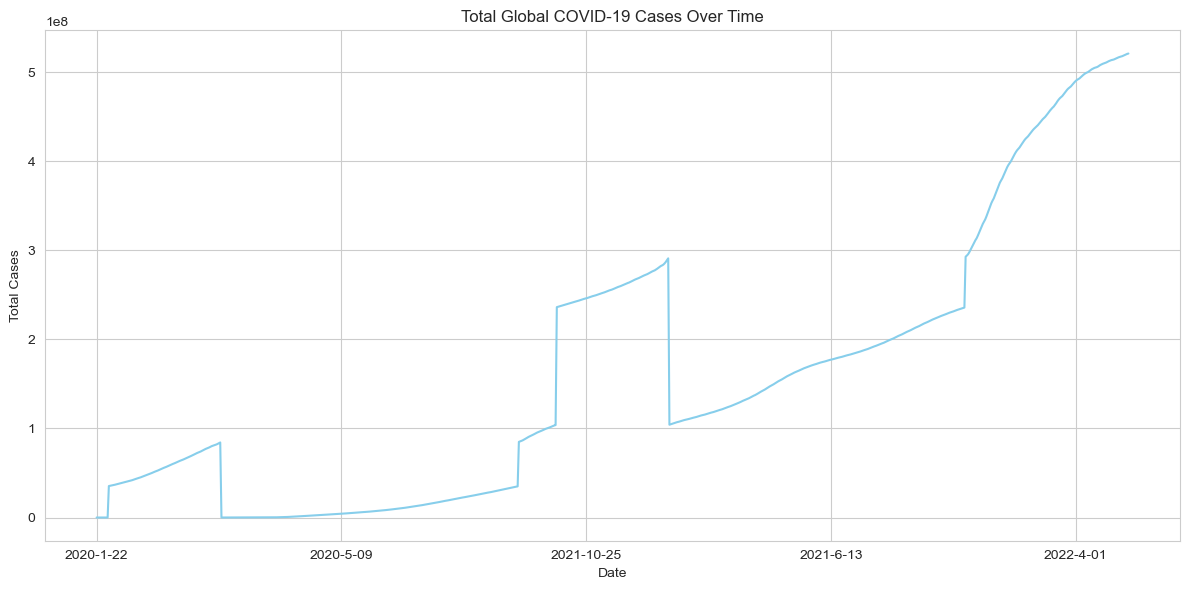

In [62]:
sns.set_style("whitegrid")


#TOTAL CASES OVER TIME

print("\nPlotting Total Global COVID-19 Cases Over Time...")
summary_cases = df.groupby('date')['cumulative_total_cases'].sum().compute()
plt.figure(figsize=(12, 6))
summary_cases.plot(title='Total Global COVID-19 Cases Over Time', color='skyblue')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

Plotting Daily COVID-19 Metrics Over Time...


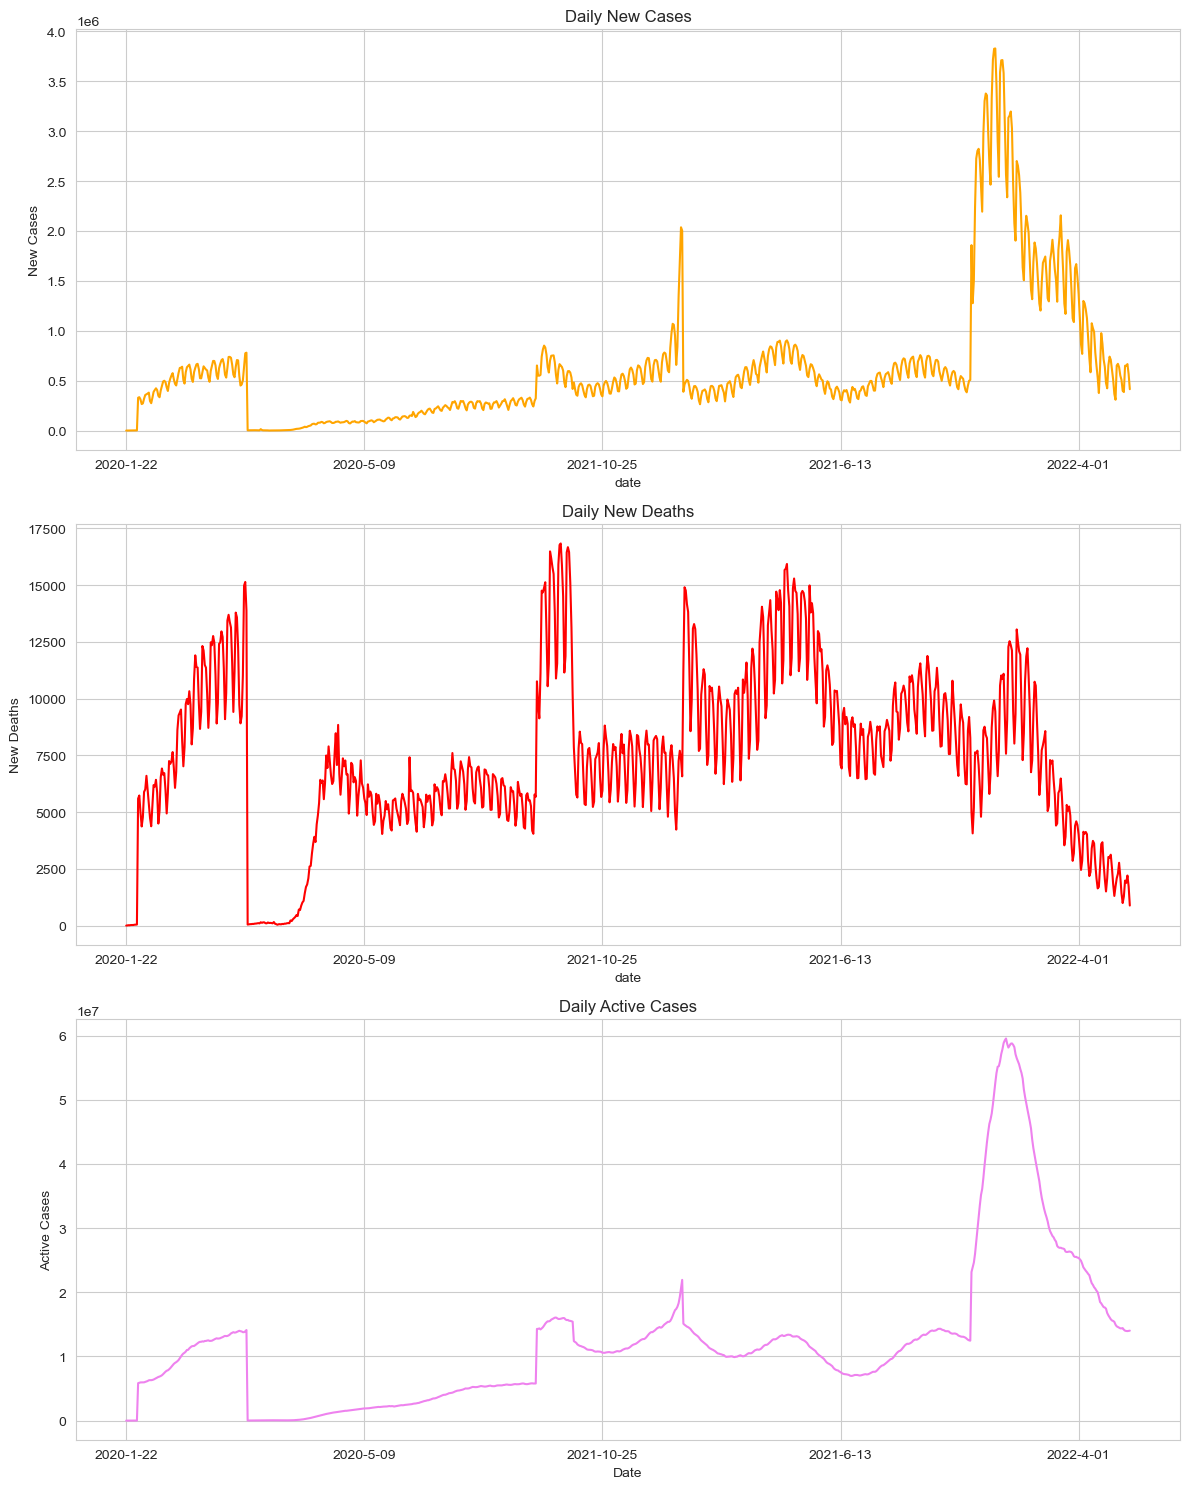

In [63]:
import matplotlib.pyplot as plt

print("Plotting Daily COVID-19 Metrics Over Time...")

fig, axes = plt.subplots(3, 1, figsize=(12, 15))  

daily_summary = df.groupby('date')[['daily_new_cases', 'daily_new_deaths', 'active_cases']].sum().compute()


daily_summary['daily_new_cases'].plot(ax=axes[0], title='Daily New Cases', color='orange')
axes[0].set_ylabel('New Cases')
axes[0].grid(True)


daily_summary['daily_new_deaths'].plot(ax=axes[1], title='Daily New Deaths', color='red')
axes[1].set_ylabel('New Deaths')
axes[1].grid(True)

daily_summary['active_cases'].plot(ax=axes[2], title='Daily Active Cases', color='violet')
axes[2].set_ylabel('Active Cases')
axes[2].set_xlabel('Date') 
axes[2].grid(True)

plt.tight_layout()

Plotting Top 10 Countries by Total Cases...


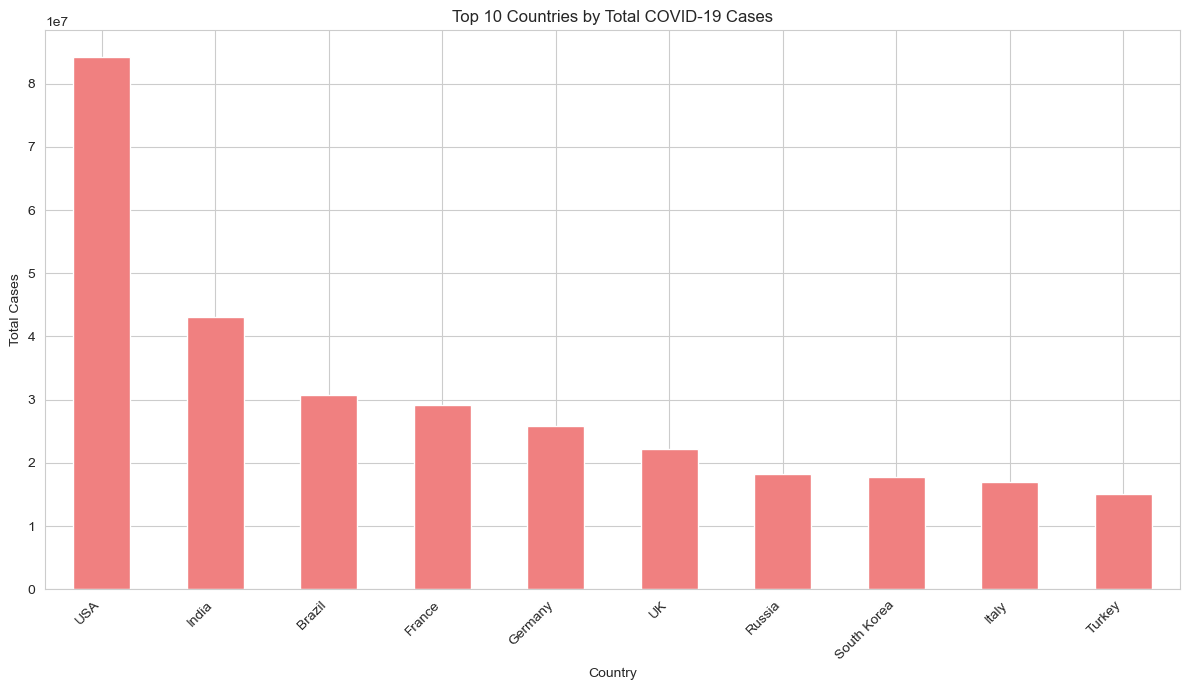

Plotting Daily New Cases for Top Countries...


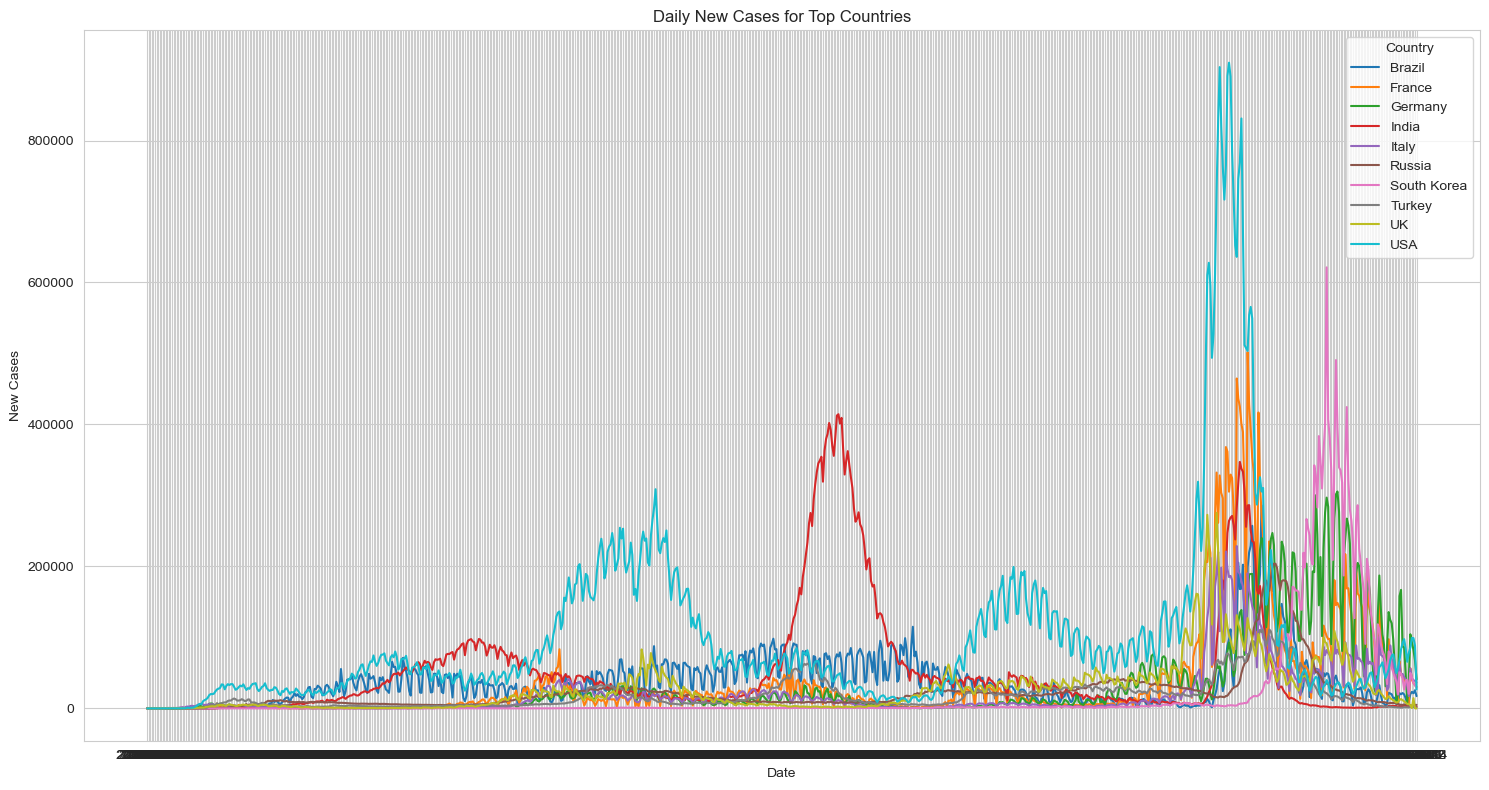

In [64]:

# Top 10 Countries by Total Cases
print("Plotting Top 10 Countries by Total Cases...")
country_cases = df.groupby('country')['cumulative_total_cases'].max().compute().nlargest(10)
plt.figure(figsize=(12, 7))
country_cases.plot(kind='bar', title='Top 10 Countries by Total COVID-19 Cases', color='lightcoral')
plt.ylabel('Total Cases')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


print("Plotting Daily New Cases for Top Countries...")
top_countries_list = country_cases.index.to_list()
df_top_countries = df[df['country'].isin(top_countries_list)].compute()
plt.figure(figsize=(15, 8))

sns.lineplot(data=df_top_countries, x='date', y='daily_new_cases', hue='country')
plt.title('Daily New Cases for Top Countries')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Correlation heatmap
print("Plotting Correlation Heatmap...")
numeric_df = df.select_dtypes(include=[np.number]).compute()
plt.figure(figsize=(10, 8)) 
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5) 
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

Plotting Correlation Heatmap...


In [ ]:
print("Plotting Distribution of New Cases...")
plt.figure(figsize=(10, 6))
sns.histplot(df['daily_new_cases'].compute(), bins=50, kde=True, color='purple')
plt.title('Distribution of Daily New Cases (Global)')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.yscale('log') 
plt.tight_layout()
plt.show()

CONCLUSION

- The dataset has been loaded efficiently, cleaned more robustly, and key metrics visualized with enhanced detail.
- Dask allows efficient processing of large datasets, demonstrating its scalability for handling big data.
- Further steps could include modeling, forecasting, deeper regional analysis, or investigating specific pandemic waves.